# 605.621 - Foundations of Algorithms

## The Maximal Clique Problem

Sabbir Ahmed

March 14, 2021

1. Introduction to the algorithm of your choice.
   1.1 Theoretical details about the algorithm and theoretical complexity
  1.2 Details about the algorithm of choice (Why did we study this algorithm? What pieces does it have? Data structures, algorithm strategies? Algorithm kind?)
2. Canonical test data (might be a script to generate it)
   2.1 Sample test data to run with the algorithm (this can be interesting examples to show the utility of the algorithm)
3. The actual code of the algorithm which can indeed run
4. Evaluation plan - empirical

## Background Terminology

According to graph theory, a __graph__ can be defined simply as a set of objects (called __nodes__ or vertices) connected together through __edges__. [\[1\]](https://www.mathworks.com/help/matlab/math/directed-and-undirected-graphs.html)

A __clique__ of a graph $G$ is a complete subgraph of $G$ such that every two distinct nodes in the clique are adjacent. A __maximal clique__ is a clique that cannot be extended by including one more adjacent nodes [\[2\]](https://mathworld.wolfram.com/Clique.html).

Consider the following graph:

In [1]:
import random
# import library for constructing and displaying graphs
import networkx as nx
import numpy as np

seed = 0
random.seed(seed)
np.random.seed(seed)

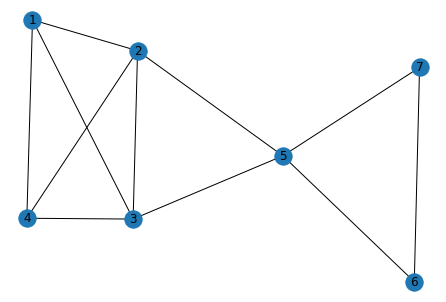

In [2]:
G = nx.Graph()  # instantiate an empty graph
G.add_nodes_from(range(1, 8))  # add 7 nodes
# connect the nodes
G.add_edges_from([
    [1, 2], [1, 3],
    [1, 4], [2, 3],
    [2, 4], [2, 5],
    [3, 4], [3, 5],
    [5, 6], [5, 7],
    [6, 7]
])

# save the x,y coordinates of the graphical representation of the graph to overlay subgraphs in the later cells
pos = nx.spring_layout(G, seed=seed)
# use networkx to draw the graph constructed
nx.draw(G, pos=pos, with_labels=True)

In [3]:
print(f"Graph G has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

Graph G has 7 nodes and 11 edges


For convenience, we begin searching for a clique from the less crowded areas of the graph, nodes 5-6-7.

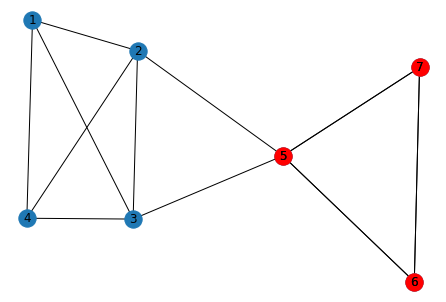

In [4]:
nx.draw(G, pos=pos, with_labels=True)
nx.draw(G.subgraph([5, 6, 7]), pos=pos, with_labels=True, node_color="red")

Those nodes form a closed triangular supgraph and each of the nodes except 5 have two neighbors (2, 3). A __neighbor__ of a node is a node that is connected by at least one edge. The triangular subgraph 5-6-7 is a clique because each of the nodes are neighbors of each other. The clique is maximal because even if vertex 5 has additional neighbors, extending the subgraph to vertex 2, for example, would not make the node neighbors of 6 or 7. The clique is maximal because it cannnot be extended further.

The next set of nodes to observe are the closed triangular subgraph 2-3-5.

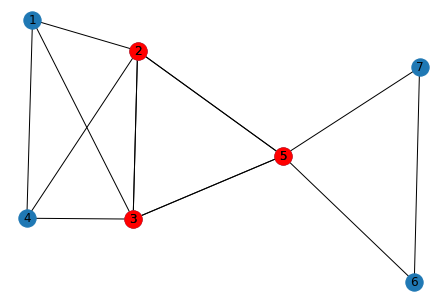

In [5]:
nx.draw(G, pos=pos, with_labels=True)
nx.draw(G.subgraph([2, 3, 5]), pos=pos, with_labels=True, node_color="red")

For the same reasons as 5-6-7, this subgraph cannot be extended with neighbors of certain nodes. Therefore, 2-3-5 is also a maximal clique.

The final set of nodes are 1-2-3-4 that form a closed rectangular subgraph.

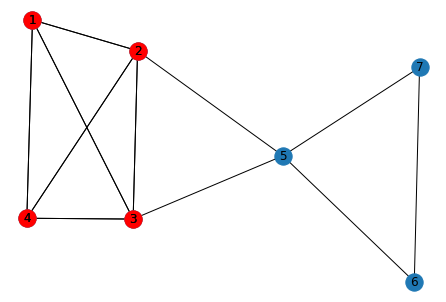

In [6]:
nx.draw(G, pos=pos, with_labels=True)
nx.draw(G.subgraph([1, 2, 3, 4]), pos=pos, with_labels=True, node_color="red")

We observe that each of the nodes are neighbors of each other, i.e. traversing between any two nodes in the subgraph takes a single iteration. This clique is maximal because it cannot be extended further by including other nodes. This maximal clique is also known as the __maximum clique__ of graph $G$ because it contains the maximum number of nodes among all the maximal cliques.

## Applications

## Algorithm

Finding the maximum number of cliques is a problem that can scale exponentially since there exist graphs with exponentially many maximal cliques. A polynomial time is often not possible if a brute-force approach is taken to find all the cliques. Several algorithms exist to enumerate all the maximal cliques in a graph, including the [Bron–Kerbosch algorithm](https://en.wikipedia.org/wiki/Bron%E2%80%93Kerbosch_algorithm) which performs in $O(3^{n/3})$ time, matching the maximum number of cliques possible in an $n$-node graph. [3]

```
Bron-Kerbosch(R, P, X)
    if P and X are both empty then
        report R as a maximal clique
    for each vertex v in P do
        Bron-Kerbosch(R ⋃ {v}, P ⋂ N(v), X ⋂ N(v))
        P = P \ {v}
        X = X ⋃ {v}
```

In [7]:
# assign the list of neighbors in the graph to a global variable to avoid passing it numerous times
N = G.neighbors

In [8]:
def bron_kerbosch(R, P, X):
    """Naive Bron–Kerbosch algorithm"""
    # if possible clique candidates and excluded nodes sets have been exhausted
    if not P and not X:
        # report maximal clique
        print(R)

    # for every nodes
    for v in list(P):
        bron_kerbosch(R | {v}, P & set(N(v)), X & set(N(v)))
        P.remove(v)
        X.add(v)

In [9]:
bron_kerbosch(set(), set(G.nodes()), set())

{1, 2, 3, 4}
{2, 3, 5}
{5, 6, 7}


The naive Bron Kerbosch algorithm is however not very efficient with many non-maximal cliques. The algorithm makes a recursive call for every clique, maximal or not. A variation of the algorithm exists with a pivot vertex to more quickly backtrack in branches of the search that contain no maximal cliques.

```
Bron-Kerbosch-Pivot(R, P, X)
    if P and X are both empty then
        report R as a maximal clique
    choose a pivot vertex u in P ⋃ X
    for each vertex v in P \ N(u) do
        BronKerbosch2(R ⋃ {v}, P ⋂ N(v), X ⋂ N(v))
        P := P \ {v}
        X := X ⋃ {v}
```

In [10]:
def pop(s):
    if s:
        return s.pop()

def bron_kerbosch_pivot(R, P, X):
    """Bron–Kerbosch algorithm with pivot"""
    # if possible clique candidates and excluded nodes sets have been exhausted
    if not P and not X:
        # report maximal clique
        print(R)
        return

    # some vertex in P | X
    pivot = pop(P | X)

    # for every nodes
    for v in list(P - set(N(pivot))):
        bron_kerbosch_pivot(R | {v}, P & set(N(v)), X & set(N(v)))
        P.remove(v)
        X.add(v)

In [11]:
bron_kerbosch_pivot(set(), set(G.nodes()), set())

{1, 2, 3, 4}
{2, 3, 5}
{5, 6, 7}


Two versions of the Bron-Kerbosch algorithm have now been implemented. However, the cliques are being flushed to the output as soon as they are found and not saved for later reference. A list variable can be passed in the recursive functions to store the cliques. An additional variable can also be included to count the number of recursions per algorithm.

In [12]:
class Helper():
    
    def __init__(self):
        
        self.cliques = []
        self.num_cliques  = 0
        self.num_recursions = 0
        
    def inc(self):
        
        self.num_recursions += 1
        
    def __add__(self, clique):
        
        self.cliques.append(clique)
        self.num_cliques += 1
        
    def report_agg(self):
        
        print(f"Total number of recursive calls: {self.num_recursions}")
        print(f"Total number of cliques found: {self.num_cliques}")

    def report(self):
        
        self.report_agg()
        for clique in self.cliques:
            print(clique)

In [13]:
def bron_kerbosch(R, P, X, helper):
    '''Naive Bron–Kerbosch algorithm'''
    helper.inc()
    if not P and not X:
        helper += R

    for v in list(P):
        bron_kerbosch(R | {v}, P & set(N(v)), X & set(N(v)), helper)
        P.remove(v)
        X.add(v)

In [14]:
def bron_kerbosch_pivot(R, P, X, helper):
    '''Bron–Kerbosch algorithm with pivot'''
    helper.inc()
    if not P and not X:
        helper += R
        return

    # some vertex in P | X
    pivot = pop(P | X)

    # for every nodes
    for v in list(P - set(N(pivot))):
        bron_kerbosch_pivot(R | {v}, P & set(N(v)), X & set(N(v)), helper)
        P.remove(v)
        X.add(v)

In [15]:
algorithm_helper = Helper()
bron_kerbosch(set(), set(G.nodes()), set(), algorithm_helper)
algorithm_helper.report()

Total number of recursive calls: 26
Total number of cliques found: 3
{1, 2, 3, 4}
{2, 3, 5}
{5, 6, 7}


In [16]:
algorithm_helper = Helper()
bron_kerbosch_pivot(set(), set(G.nodes()), set(), algorithm_helper)
algorithm_helper.report()

Total number of recursive calls: 13
Total number of cliques found: 3
{1, 2, 3, 4}
{2, 3, 5}
{5, 6, 7}


It can be observed that the algorithm implementing the pivot search performs better in terms of the number of recursive calls. This is true for graphs with relatively smaller numbers of maximal cliques. However, graphs with very large numbers of maximal cliques may lead the functions to exceed the maximum recursion depths.

The recursive Born Kerbosch algorithms can be converted to iterative versions. The iterative versions of the functions eliminate any chances of exceeding recursion depths and simplify calculations of the time and space complexities.

In [17]:
def bron_kerbosch_iter(R, P, X):
    '''Naive Bron–Kerbosch algorithm'''
    cliques = []
    num_iters = 0
    S = []
    S.append((set(), P, set()))

    while len(S):
        num_iters += 1
        R, P, X = S.pop()
        if not P and not X:
            cliques.append(R)

        if P:
            v = P.pop()
            S.append((R, P, X | {v}))
            S.append((R | {v}, P & set(N(v)), X & set(N(v))))

    return num_iters, cliques

In [18]:
def bron_kerbosch_pivot_iter(R, P, X):
    '''Naive Bron–Kerbosch algorithm'''
    cliques = []
    num_iters = 0
    S = []
    S.append((set(), P, set()))

    while len(S):
        num_iters += 1
        R, P, X = S.pop()
        if not P and not X:
            cliques.append(R)

        pivot = pop(P | X)

        if pivot:
            v = pop(P - set(N(pivot)))
            if v:
                P.remove(v)
                S.append((R, P, X | {v}))
                S.append((R | {v}, P & set(N(v)), X & set(N(v))))

    return num_iters, cliques

In [19]:
num_iters, cliques = bron_kerbosch_iter(set(), set(G.nodes()), set())
print(f"Total iterations: {num_iters}")
print(f"Total number of cliques found: {len(cliques)}")
for clique in cliques:
    print(clique)

Total iterations: 51
Total number of cliques found: 3
{1, 2, 3, 4}
{2, 3, 5}
{5, 6, 7}


In [20]:
num_iters, cliques = bron_kerbosch_pivot_iter(set(), set(G.nodes()), set())
print(f"Total iterations: {num_iters}")
print(f"Total number of cliques found: {len(cliques)}")
for clique in cliques:
    print(clique)

Total iterations: 25
Total number of cliques found: 3
{1, 2, 3, 4}
{2, 3, 5}
{5, 6, 7}


In [21]:
def gen_random_graph(n):
    e = np.random.randint(n * 1.5, n * 10)
    G = nx.gnm_random_graph(n, e)
    G.remove_node(0)
    return G, G.neighbors

In [22]:
def find_maximum_clique_len(cliques):
    return len(max(cliques, key=lambda x: len(x)))

def find_maximum_clique(cliques):
    max_len = find_maximum_clique_len(cliques)
    return [x for i, x in enumerate(cliques) if len(x) == max_len]

def find_maximum_clique_num(cliques):
    return len(find_maximum_clique(cliques))

In [23]:
G, N = gen_random_graph(20000)
num_iters, cliques = bron_kerbosch_pivot_iter(set(), set(G.nodes()), set())
print(f"Total iterations: {num_iters}")
print(f"Total number of cliques found: {len(cliques)}")

helper = Helper()
bron_kerbosch_pivot(set(), set(G.nodes()), set(), helper)
helper.report_agg()

Total iterations: 187191
Total number of cliques found: 73461
Total number of recursive calls: 93591
Total number of cliques found: 73461


In [24]:
print(find_maximum_clique_len(cliques))
print(find_maximum_clique_num(cliques))
print(find_maximum_clique_len(helper.cliques))
print(find_maximum_clique_num(helper.cliques))

3
55
3
55


## Bibliography

Moon, J., & Moser, L. (1965). On cliques in graphs. Israel Journal of Mathematics, 3, 23-28.